In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)
pd.options.mode.chained_assignment = None

In [16]:
# read in dataframe
df_orig = pd.read_csv('final_data_files/gloess_withresid.csv')

df = df_orig[(np.isfinite(df_orig.mag_j)) & (np.isfinite(df_orig.mag_h)) & (np.isfinite(df_orig.mag_k)) &
        (np.isfinite(df_orig.resid_m4_3)) & (np.isfinite(df_orig.mag_4))]

df1 = df[df.type == 0]
df2 = df[df.type == 1]

# show column names for reference
print df.columns.values

['id' 'mag_j' 'merr_j' 'type' 'per' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'mag_v' 'merr_v' 'mag_b' 'merr_b'
 'resid_m4_b' 'resid_m4_v' 'resid_m4_j' 'resid_m4_h' 'resid_m4_k'
 'resid_m4_3' 'resid_m4_4']


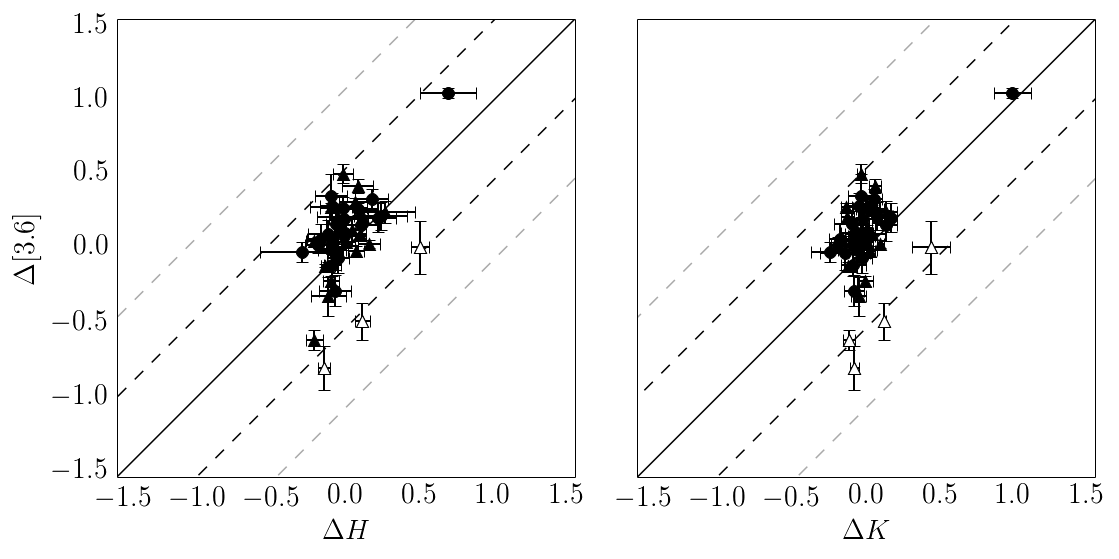

In [17]:
df['resid_h_4'] = df['resid_m4_h'] - df['resid_m4_4']
df['resid_k_4'] = df['resid_m4_k'] - df['resid_m4_4']
fig = plt.figure(figsize=(8,5))
j = 1
xspace = np.linspace(-5,5,10)
for i in ['h','k']:
    df['resid_' + i + '_4'] = df['resid_m4_' + i] - df['resid_m4_4']
    if i == 'h':
        clipped_h = sigma_clip(df['resid_h_4'], 1)
        bad_only_h = df[clipped_h.mask]
        bad_only_h0 = bad_only_h[bad_only_h.type == 0]
        bad_only_h1 = bad_only_h[bad_only_h.type == 1]
    if i == 'k':
        clipped_k = sigma_clip(df['resid_k_4'], 1)
        bad_only_k = df[clipped_k.mask]
        bad_only_k0 = bad_only_k[bad_only_k.type == 0]
        bad_only_k1 = bad_only_k[bad_only_k.type == 1]
    ax = fig.add_subplot(1,2,j, aspect='equal')
    sig = np.std(df['resid_' + i + '_4'])
    ppl.plot(ax, xspace, xspace, 'k-')
    ppl.plot(ax, xspace, xspace + sig, 'k--')
    ppl.plot(ax, xspace, xspace - sig, 'k--')
    ppl.plot(ax, xspace, xspace + 2*sig, '--', color='#AAAAAA')
    ppl.plot(ax, xspace, xspace - 2*sig, '--', color='#AAAAAA')
    ax.errorbar(df1['resid_m4_' + i], df1['resid_m4_4'],
                xerr=df1['merr_' + i], yerr=df1['merr_4'], fmt='o', color='k')
    ax.errorbar(df2['resid_m4_' + i], df2['resid_m4_4'],
                xerr=df2['merr_' + i], yerr=df2['merr_4'], fmt='^', color='k')
    if i == 'h':
        ax.plot(bad_only_h0['resid_m4_h'], bad_only_h0['resid_m4_4'], 'o', color='w')
        ax.plot(bad_only_h1['resid_m4_h'], bad_only_h1['resid_m4_4'], '^', color='w')
        ax.set_ylabel('$\Delta [3.6]$')
    if i == 'k':
        ax.plot(bad_only_k0['resid_m4_k'], bad_only_k0['resid_m4_4'], 'o', color='w')
        ax.plot(bad_only_k1['resid_m4_k'], bad_only_k1['resid_m4_4'], '^', color='w')
        ax.set_yticks([])
    ax.set_ylim(-1.55,1.55)
    ax.set_xlim(ax.get_ylim())
    ax.set_xlabel('$\Delta {}$'.format(i.upper()))
    j += 1
fig.tight_layout()
# fig.savefig('final_plots/delta_delta_hk3.pdf')

In [14]:
bad_only_h

,id,mag_j,merr_j,type,per,mag_h,merr_h,mag_k,merr_k,mag_3,merr_3,mag_4,merr_4,mag_v,merr_v,mag_b,merr_b,resid_m4_b,resid_m4_v,resid_m4_j,
20,25,13.520,0.149,0,0.588364,13.296,0.097,13.202,0.132,14.186,0.019,13.187,0.080,14.519,0.297,14.997,0.434,0.083609,0.079318,-0.059052,...
33,44,13.655,0.107,0,0.567545,13.405,0.099,13.354,0.075,14.677,0.061,13.147,0.097,14.769,0.279,15.293,0.408,-0.212391,-0.170682,-0.163058,...
63,82,13.582,0.062,1,0.335758,13.336,0.050,13.305,0.009,15.756,0.032,13.805,0.123,14.571,0.145,14.954,0.202,-0.023640,0.021947,0.090751,...
67,86,13.388,0.124,0,0.647844,13.128,0.159,13.043,0.092,16.137,0.164,12.804,0.073,14.577,0.287,15.045,0.424,0.035609,0.021318,-0.009907,...
87,108,13.393,0.137,0,0.594458,12.958,0.178,13.062,0.109,14.987,0.390,12.943,0.094,14.577,0.322,15.062,0.419,0.018609,0.021318,0.059082,...
94,115,13.414,0.063,0,0.630474,13.176,0.068,13.129,0.103,14.389,0.083,16.436,0.074,14.575,0.295,15.075,0.417,0.005609,0.023318,-0.012524,...
107,128,13.225,0.099,0,0.834988,12.963,0.107,12.831,0.088,11.675,0.110,12.459,0.145,14.406,0.179,14.928,0.265,0.152609,0.192318,-0.065232,...
122,147,13.417,0.052,1,0.422699,13.099,0.105,13.095,0.039,11.397,0.012,12.590,0.050,NaN,NaN,14.833,0.166,0.097360,NaN,0.009639,...
153,277,13.613,0.040,1,0.351563,13.391,0.056,13.365,0.035,14.132,0.043,13.205,0.054,14.507,0.031,14.881,0.030,0.049360,0.085947,0.010588,...


In [15]:
bad_only_k

,id,mag_j,merr_j,type,per,mag_h,merr_h,mag_k,merr_k,mag_3,merr_3,mag_4,merr_4,mag_v,merr_v,mag_b,merr_b,resid_m4_b,resid_m4_v,resid_m4_j,
14,19,13.886,0.049,1,0.299551,13.730,0.040,13.642,0.030,13.776,0.049,14.269,0.148,14.841,0.164,15.205,0.229,-0.274640,-0.248053,-0.091293,...
63,82,13.582,0.062,1,0.335758,13.336,0.050,13.305,0.009,15.756,0.032,13.805,0.123,14.571,0.145,14.954,0.202,-0.023640,0.021947,0.090751,...
93,114,12.576,0.127,0,0.675307,12.378,0.190,12.017,0.126,13.196,0.343,11.979,0.033,14.495,0.256,14.986,0.362,0.094609,0.103318,0.766374,...
94,115,13.414,0.063,0,0.630474,13.176,0.068,13.129,0.103,14.389,0.083,16.436,0.074,14.575,0.295,15.075,0.417,0.005609,0.023318,-0.012524,...
136,169,13.795,0.023,1,0.319116,13.720,0.055,13.603,0.039,13.737,0.031,13.995,0.068,14.643,0.077,14.922,0.110,0.008360,-0.050053,-0.067915,...
